**Q1 ) Read the dataset**

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#import keras
#from keras.models import Sequential
#from keras.layers import Dense

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
bankdf = pd.read_csv("/content/gdrive/My Drive/ML AI/NNDL Case Study Bank Customer Churnout/bank.csv")
print(bankdf.shape)
#Looking at the data read from the csv
bankdf.head(5)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check the number of rows and columns
rows, columns = bankdf.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  10000
No of columns:  14


**Q2 ) Drop the columns which are unique for all users like IDs**

In [7]:
#Dropping CustomerId and Surname from the data frame because that is a number which defines the customers uniquely and surname is the last name of the customer. 
bankdf = bankdf.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)
#Checking the shape of the data again.
bankdf.shape

(10000, 11)

In [0]:
#Before we proceeed, it is very important to convert the object columns to label encode for better computational capabilities. 
le=LabelEncoder()
for col in bankdf.columns:
  if bankdf[col].dtypes=='object':
      bankdf[col]=le.fit_transform(bankdf[col])

In [9]:
bankdf.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


0    7963
1    2037
Name: Exited, dtype: int64
Out of 10000 customers, 2037 have exited while the remaining 7963 still bank.


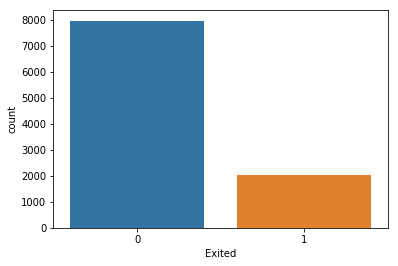

In [11]:
#Analyzing the count of bank customers who have exited. Here 1 denote the customer who has exited whereas 0 denote the customer who is still banking.
sns.countplot(bankdf["Exited"])
print(bankdf["Exited"].value_counts())
print("Out of 10000 customers, 2037 have exited while the remaining 7963 still bank.")

**Q3 ) Distinguish the feature and target set**

In [0]:
# y is the target or the dependent variable, whereas the other are the independent features.
X = bankdf.drop(["Exited"], axis=1)
y = bankdf["Exited"]

**Q4 ) Divide the data set into Train and test sets**

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
X_train.shape

(7000, 10)

In [15]:
X_test.shape

(3000, 10)

**Q5 ) Normalize the train and test data**

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Q6 ) Initialize & build the model**

In [0]:
#Initialising the ANN
classifier = tf.keras.Sequential()

In [18]:
classifier.add(layers.Dense(100,  activation = 'relu', input_dim = 10))
classifier.add(layers.Dense(100,  activation = 'relu', input_dim = 10))

W0824 18:56:39.329288 140368558430080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))

**Q7 ) Optimize the model**

In [20]:
# In order to optimize the model, two layers with 100 neurons and sgd optimizer with the learning rate of 0.01 is used.
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

W0824 18:56:39.425636 140368558430080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
classifier.fit(X_train, y_train, batch_size = 10,  epochs=100)
y_pred = classifier.predict(X_test)

Epoch 1/100
7000/7000 [==============================] - 2s 297us/sample - loss: 0.4048 - acc: 0.8281
Epoch 2/100
7000/7000 [==============================] - 2s 240us/sample - loss: 0.3552 - acc: 0.8544
Epoch 3/100
7000/7000 [==============================] - 2s 236us/sample - loss: 0.3485 - acc: 0.8577
Epoch 4/100
7000/7000 [==============================] - 2s 243us/sample - loss: 0.3430 - acc: 0.8581
Epoch 5/100
7000/7000 [==============================] - 2s 232us/sample - loss: 0.3398 - acc: 0.8641
Epoch 6/100
7000/7000 [==============================] - 2s 242us/sample - loss: 0.3363 - acc: 0.8603
Epoch 7/100
7000/7000 [==============================] - 2s 230us/sample - loss: 0.3313 - acc: 0.8656
Epoch 8/100
7000/7000 [==============================] - 2s 230us/sample - loss: 0.3269 - acc: 0.8670
Epoch 9/100
7000/7000 [==============================] - 2s 235us/sample - loss: 0.3249 - acc: 0.8659
Epoch 10/100
7000/7000 [==============================] - 2s 236us/sample - loss: 

**Q8 ) Predict the results using 0.5 as a threshold**

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

**Q9 ) Print the Accuracy score and confusion matrix**

In [23]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print("The accuracy score is")
print(test_acc)

3000/3000 [==============================] - 0s 45us/sample - loss: 0.8365 - acc: 0.8070
The accuracy score is
0.807


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2100  295]
 [ 284  321]]
